In [1]:
#import statements
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

np.set_printoptions(threshold=sys.maxsize)

In [2]:
#data aquisition - scrape content from website. 
webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

soup =BeautifulSoup(webpage.content, "html.parser")
print(soup)


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
<script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<

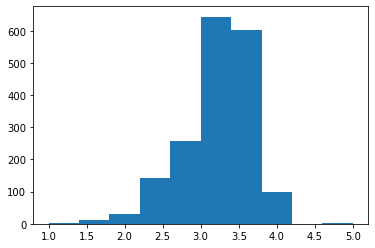

In [3]:
#get ratings text from specified class and append to array

choc_rating = soup.select(".Rating")
ratings = []

for r in choc_rating:
    rate = r.get_text()
    ratings.append(rate)
#print(ratings)
ratings.remove('Rating')
ratings = [float(i) for i in ratings]
#print(ratings)

histogram = plt.hist(ratings)
plt.show()



In [4]:
#get company name text from specified class and append to array
company_name = soup.select(".Company")
#print(company_name)
companies = []

for c in company_name: 
    companies.append(c.get_text())
del companies[0]
#print(companies)



In [5]:
#get cocoa % text from specified class and append to array
cocoa_percent = soup.select(".CocoaPercent")
#print(cocoa_percent)
cocoa = []

for p in cocoa_percent: 
  cocoa.append(p.get_text())
del cocoa[0]
clean = [i.strip('%') for i in cocoa]
cac = [float(i) for i in clean]
#print(cac)



In [62]:
#get bean type text from specified class and append to array
bean_type = soup.select(".BeanType")
beans = []

for r in bean_type:
    bean = r.get_text()
    if bean == '\xa0':
        bean = None
    beans.append(bean)
del beans[0]
#print(beans)

In [63]:
#get origin text from specified class and append to array
origin = soup.select(".Origin")
origins = []

for r in origin:
    o = r.get_text()
    origins.append(o)
del origins[0]
#print(origins)

In [80]:
#get broad bean origin text from specified class and append to array
broad_bean_origin = soup.select(".BroadBeanOrigin")
bbo = []

for r in broad_bean_origin:
    o = r.get_text()
    if o == '\xa0':
        o = None
    bbo.append(o)
del bbo[0]
#print(bbo)

In [81]:
#get company location text from specified class and append to array
company_location = soup.select(".CompanyLocation")
c_loc = []

for r in company_location:
    loc = r.get_text()
 #   if loc == '\xa0':
  #      loc = ''
    c_loc.append(loc)
del c_loc[0]
#print(c_loc)

In [82]:
#get review date text from specified class and append to array
review_date = soup.select(".ReviewDate")
rd = []

for p in review_date: 
    rd.append(p.get_text())
del rd[0]
rd = [int(i) for i in rd]
#print(rd)

In [83]:
#get reference text from specified class and append to array
ref = soup.select(".REF")
refs = []

for p in ref: 
    refs.append(p.get_text())
del refs[0]
refs = [int(i) for i in refs]
#print(refs)

In [84]:
# combine arrays in pandas dataframe
df = pd.DataFrame(list(zip(refs, rd, companies, c_loc, beans, origins, bbo, cac, ratings)),columns=\
                 ['Reference', 'Review Date', 'Company', 'Company Location', 'Bean Type', 'Origin', 'Broad Bean Origin', 'CocoaPercentage',  'Ratings'])
print(df.head(20))

    Reference  Review Date   Company Company Location   Bean Type  \
0        1876         2016  A. Morin           France        None   
1        1676         2015  A. Morin           France        None   
2        1676         2015  A. Morin           France        None   
3        1680         2015  A. Morin           France        None   
4        1704         2015  A. Morin           France        None   
5        1315         2014  A. Morin           France     Criollo   
6        1315         2014  A. Morin           France        None   
7        1315         2014  A. Morin           France     Criollo   
8        1319         2014  A. Morin           France     Criollo   
9        1319         2014  A. Morin           France        None   
10       1011         2013  A. Morin           France        None   
11       1011         2013  A. Morin           France     Criollo   
12       1011         2013  A. Morin           France        None   
13       1011         2013  A. Mor

In [85]:
#view dataframe info and summary statistics
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reference          1795 non-null   int64  
 1   Review Date        1795 non-null   int64  
 2   Company            1795 non-null   object 
 3   Company Location   1795 non-null   object 
 4   Bean Type          908 non-null    object 
 5   Origin             1795 non-null   object 
 6   Broad Bean Origin  1722 non-null   object 
 7   CocoaPercentage    1795 non-null   float64
 8   Ratings            1795 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB
None
         Reference  Review Date  CocoaPercentage      Ratings
count  1795.000000  1795.000000      1795.000000  1795.000000
mean   1035.904735  2012.325348        71.698329     3.185933
std     552.886365     2.927210         6.323118     0.478062
min       5.000000  2006.000000        42.000000 

In [189]:
df['Bean Type'] = df['Bean Type'].replace([''], None)
print(df['Bean Type'].unique())
dfn=df.dropna().reset_index()
print(dfn['Bean Type'].unique())
#check if there is an empty string in 'Bean Type' which is effecting my results
#empties=dfn[dfn['Bean Type'] == '']
#print(empties)
#There is, so it is fixed above with .replace()

[None 'Criollo' 'Trinitario' 'Forastero (Arriba)' 'Forastero'
 'Forastero (Nacional)' 'Criollo, Trinitario' 'Criollo (Porcelana)'
 'Blend' 'Trinitario (85% Criollo)' 'Forastero (Catongo)'
 'Forastero (Parazinho)' 'Trinitario, Criollo' 'CCN51' 'Criollo (Ocumare)'
 'Nacional' 'Criollo (Ocumare 61)' 'Criollo (Ocumare 77)'
 'Criollo (Ocumare 67)' 'Criollo (Wild)' 'Beniano' 'Amazon mix'
 'Trinitario, Forastero' 'Forastero (Arriba) ASS' 'Criollo, +' 'Amazon'
 'Amazon, ICS' 'EET' 'Blend-Forastero,Criollo' 'Trinitario (Scavina)'
 'Criollo, Forastero' 'Matina' 'Forastero(Arriba, CCN)'
 'Nacional (Arriba)' 'Forastero (Arriba) ASSS' 'Forastero, Trinitario'
 'Forastero (Amelonado)' 'Trinitario, Nacional' 'Trinitario (Amelonado)'
 'Trinitario, TCGA' 'Criollo (Amarru)']
['Criollo' 'Trinitario' 'Forastero (Arriba)' 'Forastero'
 'Forastero (Nacional)' 'Criollo, Trinitario' 'Criollo (Porcelana)'
 'Trinitario (85% Criollo)' 'Forastero (Catongo)' 'Forastero (Parazinho)'
 'Blend' 'Trinitario, Criollo' 'CC

In [177]:
#ratings averages - by review year, overall

avg_year = df.groupby('Review Date').Ratings.mean()
print(avg_year)

overall_avg = df.Ratings.mean()
print(overall_avg)

# split dataframe on ratings boundaries for clearer visualisations
min_ratings=df[(df.Ratings) <= 1.5]
print(min_ratings)

mid_ratings=df[(df.Ratings <= 2.0) & (df.Ratings >= 1.5)]
print(mid_ratings)

max_ratings=df[(df.Ratings) >= 4.0]
print(max_ratings)


Review Date
2006    3.125000
2007    3.162338
2008    2.994624
2009    3.073171
2010    3.148649
2011    3.256061
2012    3.178205
2013    3.197011
2014    3.189271
2015    3.246491
2016    3.226027
2017    3.312500
Name: Ratings, dtype: float64
3.185933147632312
      Reference  Review Date                   Company Company Location  \
245          81         2006                    Bonnat           France   
249         341         2009    Bouga Cacao (Tulicorp)          Ecuador   
324         259         2008   Cacaoyere (Ecuatoriana)          Ecuador   
326         141         2007                 Callebaut          Belgium   
437         252         2008           Claudio Corallo         Sao Tome   
449         817         2012                 Coppeneur          Germany   
465          48         2006        Cote d' Or (Kraft)          Belgium   
554          63         2006        Dolfin (Belcolade)          Belgium   
988         721         2011  Machu Picchu Trading Co.       

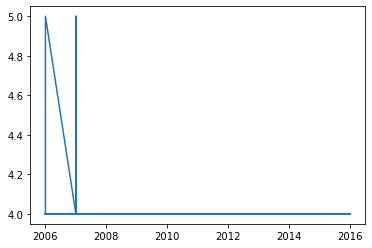

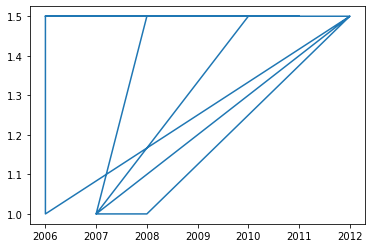

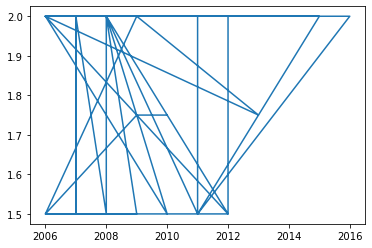

In [178]:
# plot graphs of ratings by review date
plt.plot(max_ratings['Review Date'], max_ratings['Ratings'])
plt.show()
plt.plot(min_ratings['Review Date'], min_ratings['Ratings'])
plt.show()
plt.plot(mid_ratings['Review Date'], mid_ratings['Ratings'])
plt.show()

In [179]:
#split dataframe into a seperate dataframe for each year to visualise ratings per year

six=df[df['Review Date'] == 2006]
#print(six.head())
seven=df[df['Review Date'] == 2007]
#print(seven.head())
eight=df[df['Review Date'] == 2008]
#print(eight.head())
nine=df[df['Review Date'] == 2009]
#print(nine.head())
ten=df[df['Review Date'] == 2010]
#print(ten.head())
eleven=df[df['Review Date'] == 2011]
#print(eleven.head())
twelve=df[df['Review Date'] == 2012]
#print(eight.head())
thirteen=df[df['Review Date'] == 2013]
#print(thirteen.head())
fourteen=df[df['Review Date'] == 2014]
#print(fourteen.head())
fifteen=df[df['Review Date'] == 2015]
#print(fifteen.head())
sixteen=df[df['Review Date'] == 2016]
#print(sixteen.head())
seventeen=df[df['Review Date'] == 2017]
#print(seventeen.head())

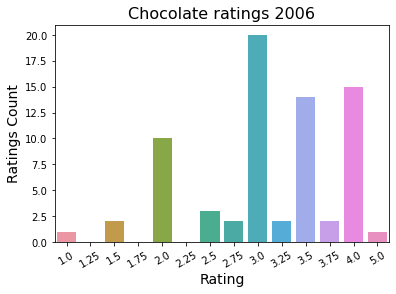

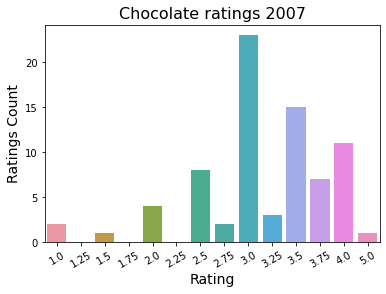

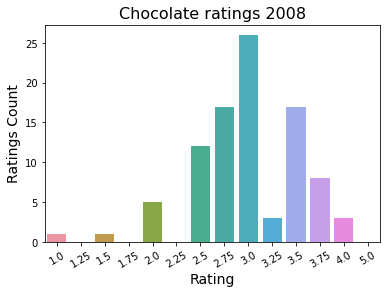

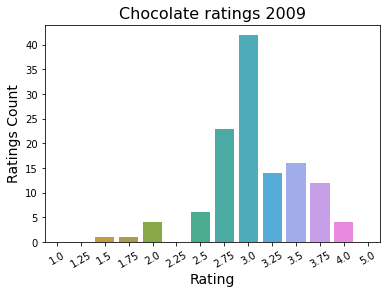

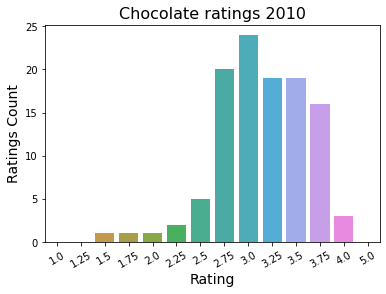

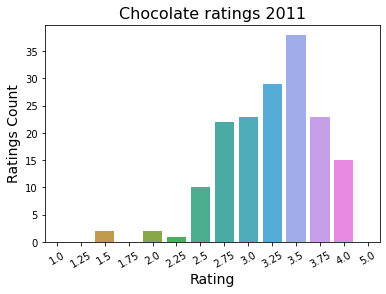

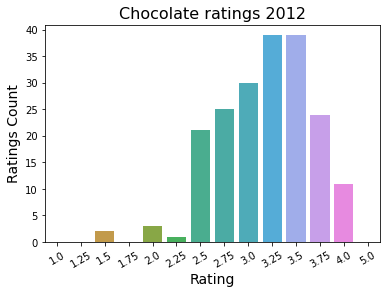

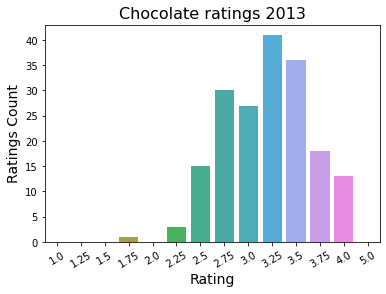

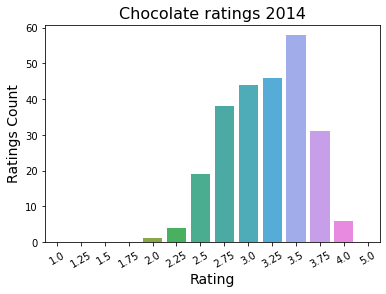

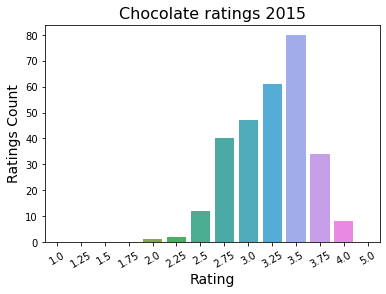

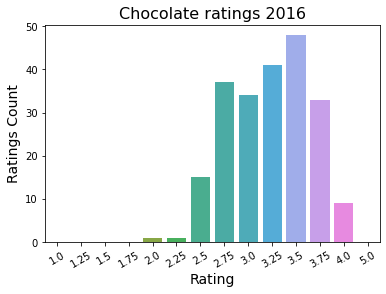

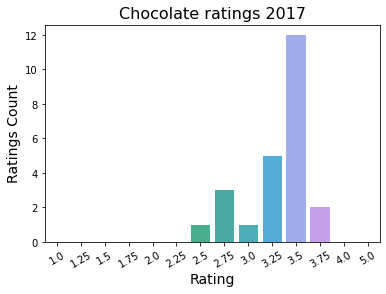

In [180]:
#plot ratings for each year on a bargraph. 
label_order=[1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 5.0]
ax=sns.countplot(data=six, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2006', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

ax=sns.countplot(data=seven, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2007', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

ax=sns.countplot(data=eight, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2008', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

ax=sns.countplot(data=nine, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2009', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

ax=sns.countplot(data=ten, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2010', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

ax=sns.countplot(data=eleven, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2011', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

ax=sns.countplot(data=twelve, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2012', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

ax=sns.countplot(data=thirteen, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2013', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

ax=sns.countplot(data=fourteen, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2014', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

ax=sns.countplot(data=fifteen, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2015', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

ax=sns.countplot(data=sixteen, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2016', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

ax=sns.countplot(data=seventeen, x='Ratings', order=label_order)
plt.title('Chocolate ratings 2017', size=16)
ax.set_xticklabels(labels=label_order, rotation=30)
plt.xlabel('Rating', size=14)
plt.ylabel('Ratings Count', size=14)
plt.show()

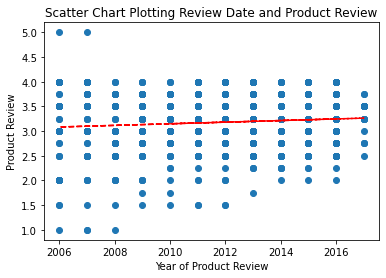

In [181]:
plt.clf()
plt.scatter(df['Review Date'], df.Ratings)
z = np.polyfit(df['Review Date'], df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(df['Review Date'], line_function(df['Review Date']), "r--")
plt.xlabel('Year of Product Review')
plt.ylabel('Product Review')
plt.title('Scatter Chart Plotting Review Date and Product Review')
plt.show()

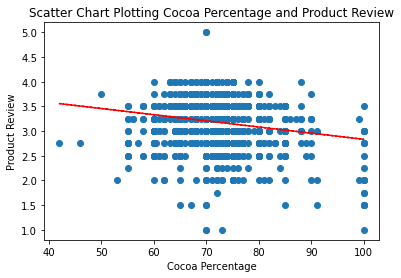

In [182]:
#scatter chart showing ratings based on cocoa percentage

plt.clf()
plt.scatter(df.CocoaPercentage, df.Ratings)
z = np.polyfit(df.CocoaPercentage, df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.xlabel('Cocoa Percentage')
plt.ylabel('Product Review')
plt.title('Scatter Chart Plotting Cocoa Percentage and Product Review')
plt.show()

In [183]:
#split dataframe into a seperate dataframe for cocoa % boundaries to visualise ratings based on cocoa percentage
cocoa_U60=df[df['CocoaPercentage'] < 60]
cocoa_U60=cocoa_U60.sort_values(by=['CocoaPercentage'], ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None) 
print(cocoa_U60['CocoaPercentage'].unique())

cocoa_U6065=df[(df['CocoaPercentage'] >= 60) & (df['CocoaPercentage'] <= 65)]
cocoa_U6065=cocoa_U6065.sort_values(by=['CocoaPercentage'], ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None) 
print(cocoa_U6065['CocoaPercentage'].unique())

cocoa_U6669=df[(df['CocoaPercentage'] > 65) & (df['CocoaPercentage'] <= 69)]
cocoa_U6669=cocoa_U6669.sort_values(by=['CocoaPercentage'], ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None) 
print(cocoa_U6669['CocoaPercentage'].unique())

cocoa_U7074=df[(df['CocoaPercentage'] > 69) & (df['CocoaPercentage'] <= 74)]
cocoa_U7074=cocoa_U7074.sort_values(by=['CocoaPercentage'], ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None) 
print(cocoa_U7074['CocoaPercentage'].unique())

cocoa_U7479=df[(df['CocoaPercentage'] > 74) & (df['CocoaPercentage'] < 80)]
cocoa_U7479=cocoa_U7479.sort_values(by=['CocoaPercentage'], ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None) 
print(cocoa_U7479['CocoaPercentage'].unique())

cocoa_U8084=df[(df['CocoaPercentage'] >= 80) & (df['CocoaPercentage'] < 84)]
cocoa_U8084=cocoa_U8084.sort_values(by=['CocoaPercentage'], ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None) 
print(cocoa_U8084['CocoaPercentage'].unique())

cocoa_U8489=df[(df['CocoaPercentage'] >= 84) & (df['CocoaPercentage'] < 89)]
cocoa_U8489=cocoa_U8489.sort_values(by=['CocoaPercentage'], ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None) 
print(cocoa_U8489['CocoaPercentage'].unique())

cocoa_U90100=df[(df['CocoaPercentage'] >= 90) & (df['CocoaPercentage'] <= 100)]
cocoa_U90100=cocoa_U90100.sort_values(by=['CocoaPercentage'], ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None) 
print(cocoa_U90100['CocoaPercentage'].unique())

[42. 46. 50. 53. 55. 56. 57. 58.]
[60.  60.5 61.  62.  63.  64.  65. ]
[66. 67. 68. 69.]
[70.  71.  72.  72.5 73.  73.5 74. ]
[75. 76. 77. 78. 79.]
[80. 81. 82. 83.]
[84. 85. 86. 87. 88.]
[ 90.  91.  99. 100.]


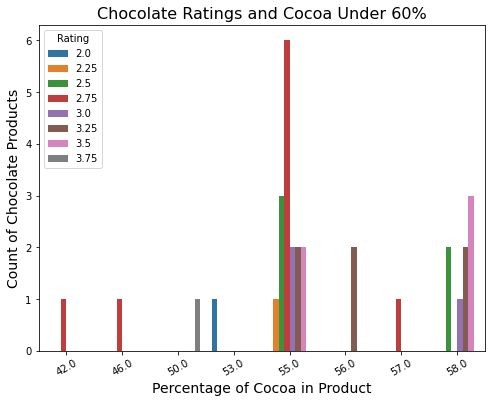

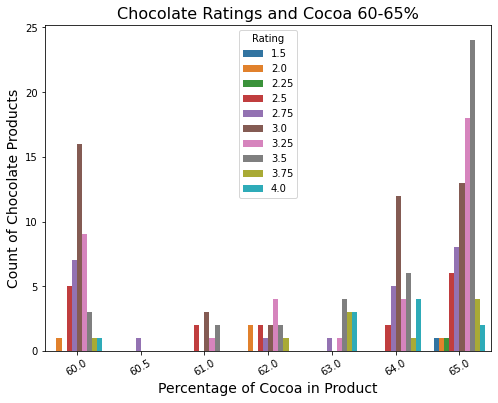

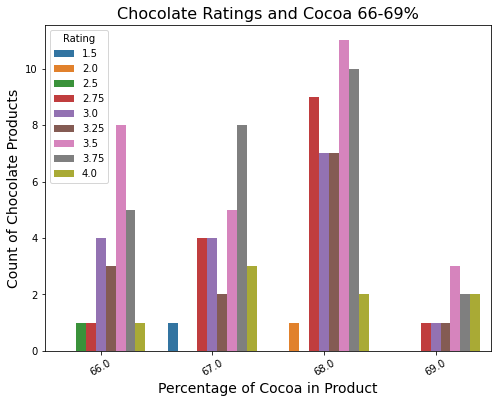

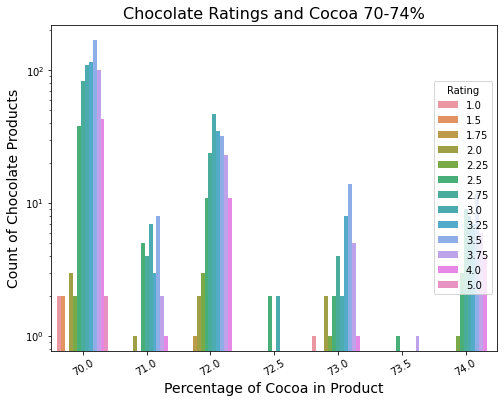

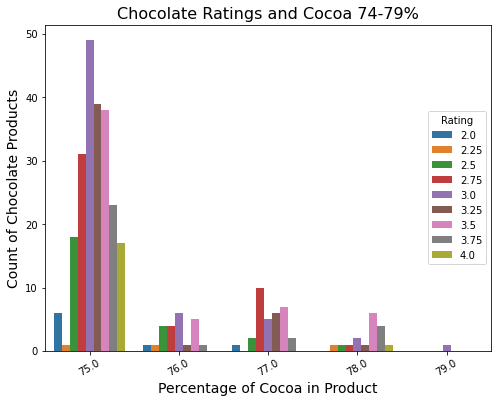

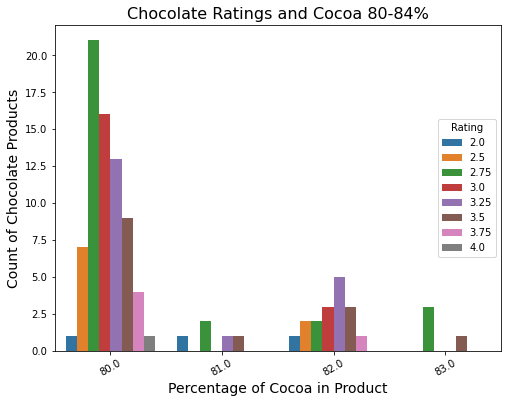

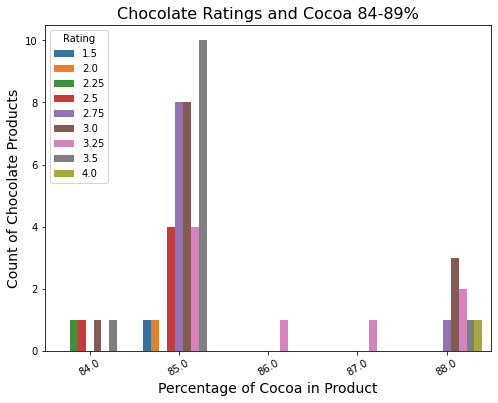

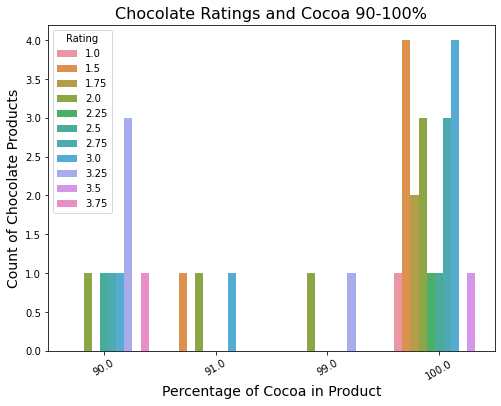

In [184]:
#plot ratings vased on cocoa percentage on a bargraph. 
f, ax = plt.subplots(figsize=(8, 6)) 
ax=sns.countplot(data=cocoa_U60, x='CocoaPercentage', hue='Ratings')
plt.title('Chocolate Ratings and Cocoa Under 60%', size=16)
ax.set_xticklabels(labels=cocoa_U60.CocoaPercentage.unique(), rotation=30)
plt.xlabel('Percentage of Cocoa in Product', size=14)
plt.ylabel('Count of Chocolate Products', size=14)
plt.legend(title='Rating', loc=2)
plt.show()

f, ax = plt.subplots(figsize=(8, 6)) 
ax=sns.countplot(data=cocoa_U6065, x='CocoaPercentage', hue='Ratings')
plt.title('Chocolate Ratings and Cocoa 60-65%', size=16)
ax.set_xticklabels(labels=cocoa_U6065.CocoaPercentage.unique(), rotation=30)
plt.xlabel('Percentage of Cocoa in Product', size=14)
plt.ylabel('Count of Chocolate Products', size=14)
plt.legend(title='Rating', loc=9)
plt.show()

f, ax = plt.subplots(figsize=(8, 6)) 
ax=sns.countplot(data=cocoa_U6669, x='CocoaPercentage', hue='Ratings')
plt.title('Chocolate Ratings and Cocoa 66-69%', size=16)
ax.set_xticklabels(labels=cocoa_U6669.CocoaPercentage.unique(), rotation=30)
plt.xlabel('Percentage of Cocoa in Product', size=14)
plt.ylabel('Count of Chocolate Products', size=14)
plt.legend(title='Rating', loc=2)
plt.show()

f, ax = plt.subplots(figsize=(8, 6)) 
ax=sns.countplot(data=cocoa_U7074, x='CocoaPercentage', hue='Ratings')
plt.title('Chocolate Ratings and Cocoa 70-74%', size=16)
ax.set_xticklabels(labels=cocoa_U7074.CocoaPercentage.unique(), rotation=30)
plt.xlabel('Percentage of Cocoa in Product', size=14)
plt.yscale('log')
plt.ylabel('Count of Chocolate Products', size=14)
plt.legend(title='Rating', loc=5)
plt.show()

f, ax = plt.subplots(figsize=(8, 6)) 
ax=sns.countplot(data=cocoa_U7479, x='CocoaPercentage', hue='Ratings')
plt.title('Chocolate Ratings and Cocoa 74-79%', size=16)
ax.set_xticklabels(labels=cocoa_U7479.CocoaPercentage.unique(), rotation=30)
plt.xlabel('Percentage of Cocoa in Product', size=14)
plt.ylabel('Count of Chocolate Products', size=14)
plt.legend(title='Rating', loc=5)
plt.show()

f, ax = plt.subplots(figsize=(8, 6)) 
ax=sns.countplot(data=cocoa_U8084, x='CocoaPercentage', hue='Ratings')
plt.title('Chocolate Ratings and Cocoa 80-84%', size=16)
ax.set_xticklabels(labels=cocoa_U8084.CocoaPercentage.unique(), rotation=30)
plt.xlabel('Percentage of Cocoa in Product', size=14)
plt.ylabel('Count of Chocolate Products', size=14)
plt.legend(title='Rating', loc=5)
plt.show()

f, ax = plt.subplots(figsize=(8, 6)) 
ax=sns.countplot(data=cocoa_U8489, x='CocoaPercentage', hue='Ratings')
plt.title('Chocolate Ratings and Cocoa 84-89%', size=16)
ax.set_xticklabels(labels=cocoa_U8489.CocoaPercentage.unique(), rotation=30)
plt.xlabel('Percentage of Cocoa in Product', size=14)
plt.ylabel('Count of Chocolate Products', size=14)
plt.legend(title='Rating', loc=2)
plt.show()

f, ax = plt.subplots(figsize=(8, 6)) 
ax=sns.countplot(data=cocoa_U90100, x='CocoaPercentage', hue='Ratings')
plt.title('Chocolate Ratings and Cocoa 90-100%', size=16)
ax.set_xticklabels(labels=cocoa_U90100.CocoaPercentage.unique(), rotation=30)
plt.xlabel('Percentage of Cocoa in Product', size=14)
plt.ylabel('Count of Chocolate Products', size=14)
plt.legend(title='Rating', loc=2)
plt.show()

In [185]:
#print top 10 average ratings for broad bean origins grouped by year

bbo_year = dfn.groupby(['Broad Bean Origin', 'Review Date']).Ratings.mean()
top_bboy = bbo_year.nlargest(15)
print(top_bboy)

bbo = dfn.groupby(['Broad Bean Origin']).Ratings.mean()
top_bbo = bbo.nlargest(10)
print(top_bbo)

Broad Bean Origin            Review Date
Bolivia                      2006           4.000000
Dom. Rep., Madagascar        2012           4.000000
Gre., PNG, Haw., Haiti, Mad  2012           4.000000
Mexico                       2006           4.000000
Papua New Guinea             2013           4.000000
South America                2006           4.000000
Tobago                       2012           4.000000
Venezuela, Java              2007           4.000000
Indonesia                    2011           3.875000
Bolivia                      2016           3.833333
Congo                        2008           3.750000
Costa Rica                   2010           3.750000
                             2016           3.750000
Cuba                         2010           3.750000
                             2014           3.750000
Name: Ratings, dtype: float64
Broad Bean Origin
Dom. Rep., Madagascar          4.000
Gre., PNG, Haw., Haiti, Mad    4.000
Tobago                         4.000
Venez

In [186]:
ori_year = df.groupby(['Origin', 'Review Date']).Ratings.mean()
top_oy = ori_year.nlargest(10)
print(top_oy)

Origin                                       Review Date
Chuao                                        2007           5.0
Toscano Black                                2006           4.5
ABOCFA Coop                                  2015           4.0
Alto Beni, Cru Savage                        2006           4.0
Asante                                       2009           4.0
Bali, Sukrama Bros. Farm, Melaya, 62hr C     2011           4.0
Bellavista Coop, #225, LR, MC, CG Exclusive  2013           4.0
Cabosse                                      2007           4.0
Carenero Superior, Urrutia, Barlovento       2011           4.0
Chuao                                        2006           4.0
Name: Ratings, dtype: float64


In [187]:
chuao= df[df.Origin == 'Chuao'].groupby(['Review Date']).Ratings.mean()
print(chuao)

Review Date
2006    4.000000
2007    5.000000
2010    3.000000
2011    3.500000
2012    3.166667
2013    3.333333
2014    3.375000
2015    3.500000
2016    3.000000
Name: Ratings, dtype: float64


In [190]:
#print top 10 average ratings for bean type grouped by year 
bean_year = dfn.groupby(['Bean Type', 'Review Date']).Ratings.mean()
top_beany = bean_year.nlargest(10)
print(dfn['Bean Type'].unique())
print(top_beany)

bean = dfn.groupby(['Bean Type']).Ratings.mean()
top_bean = bean.nlargest(10)
print(top_bean)



['Criollo' 'Trinitario' 'Forastero (Arriba)' 'Forastero'
 'Forastero (Nacional)' 'Criollo, Trinitario' 'Criollo (Porcelana)'
 'Trinitario (85% Criollo)' 'Forastero (Catongo)' 'Forastero (Parazinho)'
 'Blend' 'Trinitario, Criollo' 'CCN51' 'Criollo (Ocumare)' 'Nacional'
 'Criollo (Ocumare 61)' 'Criollo (Ocumare 77)' 'Criollo (Ocumare 67)'
 'Criollo (Wild)' 'Beniano' 'Amazon mix' 'Trinitario, Forastero'
 'Forastero (Arriba) ASS' 'Criollo, +' 'Amazon' 'Amazon, ICS' 'EET'
 'Blend-Forastero,Criollo' 'Trinitario (Scavina)' 'Criollo, Forastero'
 'Matina' 'Forastero(Arriba, CCN)' 'Nacional (Arriba)'
 'Forastero (Arriba) ASSS' 'Forastero, Trinitario' 'Forastero (Amelonado)'
 'Trinitario, Nacional' 'Trinitario (Amelonado)' 'Trinitario, TCGA'
 'Criollo (Amarru)']
Bean Type                 Review Date
Criollo (Ocumare 67)      2007           4.000
Criollo (Wild)            2006           4.000
Criollo, Trinitario       2006           4.000
                          2007           4.000
Beniano     

In [193]:
criollo= df[df['Bean Type'].isin(['Criollo'])].groupby(['Review Date']).Ratings.mean()
print(criollo)

Review Date
2006    3.409091
2007    3.666667
2008    3.055556
2009    3.181818
2010    2.892857
2011    3.500000
2012    3.073529
2013    3.132353
2014    3.300000
2015    3.312500
2016    3.211538
Name: Ratings, dtype: float64


In [25]:
#print top 10 average ratings for company location grouped by year 
cloc_year = df.groupby(['Company Location', 'Review Date']).Ratings.mean()
top_cloc = cloc_year.nlargest(10)
print(top_cloc)


Company Location  Review Date
Ecuador           2016           4.0000
Belgium           2011           3.8750
Australia         2013           3.8125
Scotland          2015           3.8125
Bolivia           2011           3.7500
Canada            2010           3.7500
Chile             2015           3.7500
Colombia          2015           3.7500
Iceland           2016           3.7500
Italy             2006           3.7500
Name: Ratings, dtype: float64


In [206]:
ecuador= df[df['Company Location'] == 'Ecuador'].groupby(['Review Date']).Ratings.mean()
#.groupby(['Review Date']).Ratings.mean()
print(ecuador)

Review Date
2007    3.416667
2008    2.822917
2009    2.725000
2010    3.000000
2011    3.375000
2012    3.375000
2014    3.357143
2015    3.416667
2016    4.000000
Name: Ratings, dtype: float64


In [203]:
#print top 10 average ratings for company location and broad bean origin, grouped by year 
cloc_bbo_year = df.groupby(['Company Location', 'Broad Bean Origin','Review Date']).Ratings.mean()
top_cloc_bbo = cloc_bbo_year.nlargest(10)
print(top_cloc_bbo)

Company Location  Broad Bean Origin            Review Date
Australia         Ecuador                      2015           4.0
                  Madagascar                   2013           4.0
                  Papua New Guinea             2013           4.0
Belgium           Ecuador                      2013           4.0
                  Indonesia                    2011           4.0
                  Madagascar                   2007           4.0
                  Mexico                       2006           4.0
                  Venezuela, Java              2007           4.0
Canada            Dom. Rep., Madagascar        2012           4.0
                  Gre., PNG, Haw., Haiti, Mad  2012           4.0
Name: Ratings, dtype: float64


In [27]:
#print top 10 average ratings for company, grouped by year 
avg_company = df.groupby('Company').Ratings.mean()
top_com = avg_company.nlargest(10)
print(top_com)


Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


In [197]:
tobago= df[df.Company == 'Ocelot']
#.groupby(['Review Date']).Ratings.mean()
print(tobago)

      Reference  Review Date Company Company Location  Bean Type   Origin  \
1202       1558         2015  Ocelot         Scotland  Forastero  Virunga   
1203       1558         2015  Ocelot         Scotland    Criollo    Piura   

     Broad Bean Origin  CocoaPercentage  Ratings  
1202             Congo             70.0     3.75  
1203              Peru             75.0     4.00  


In [28]:
#print top 10 average ratings for broad bean origin grouped by year 
bbol = df["Broad Bean Origin"].unique()
print(len(bbol))
print(df.groupby(df["Broad Bean Origin"]).count())

100
                           Reference  Review Date  Company  Company Location  \
Broad Bean Origin                                                              
                                  74           74       74                74   
Africa, Carribean, C. Am.          1            1        1                 1   
Australia                          3            3        3                 3   
Belize                            49           49       49                49   
Bolivia                           57           57       57                57   
...                              ...          ...      ...               ...   
Venezuela, Java                    1            1        1                 1   
Venezuela, Trinidad                1            1        1                 1   
Venezuela/ Ghana                   1            1        1                 1   
Vietnam                           38           38       38                38   
West Africa                        6

## Hypothesis Testing - Chi Squared

In [29]:
#perform a chi squared contingency test to see if there is an association between 'origin' and rating

#create a pandas crosstab of the two series being tested.
ct_bo = pd.crosstab(df['Origin'], df['Ratings'])
#print(ct_bo)

chi2, pval, dof, expected = chi2_contingency(ct_bo)
print('The chi-squared contingency test between bean origin and rating of chocolate shows a pval of ' + str(pval) + '. This is higher than the significance threshold of 0.05, indicating that there is no significant association between Bean Origin and Rating.')

The chi-squared contingency test between bean origin and rating of chocolate shows a pval of 0.8878288022134178. This is higher than the significance threshold of 0.05, indicating that there is no significant association between Bean Origin and Rating.


In [100]:
#perform a chi squared contingency test to see if there is an association between 'broad bean origin' and rating

#create a pandas crosstab of the two series being tested.
ct_bbo = pd.crosstab(dfn['Broad Bean Origin'], df['Ratings'])
#print(ct_bbo)
chi2, pval, dof, expected = chi2_contingency(ct_bbo)
print('The chi-squared contingency test between broad bean origin and rating of chocolate shows a pval of ' + str(pval) + '.  This is higher than the significance threshold of 0.05, indicating that there is no significant association between Broad Bean Origin and Rating.')

The chi-squared contingency test between broad bean origin and rating of chocolate shows a pval of 0.9999999999999815.  This is higher than the significance threshold of 0.05, indicating that there is no significant association between Broad Bean Origin and Rating.


In [31]:
#perform a chi squared contingency test to see if there is an association between 'company' and rating

#create a pandas crosstab of the two series being tested.
ct_com = pd.crosstab(df['Company'], df['Ratings'])
#print(ct_com)
chi2, pval, dof, expected = chi2_contingency(ct_com)
print('The chi-squared contingency test between company and rating of chocolate shows a pval of ' + str(pval) + '.  This is lower than the significance threshold of 0.05,  indiating that there is a significant association between Company and Rating.')

The chi-squared contingency test between company and rating of chocolate shows a pval of 1.5671040278099777e-25.  This is lower than the significance threshold of 0.05,  indiating that there is a significant association between Company and Rating.


In [32]:
#perform a chi squared contingency test to see if there is an association between 'compan location' and rating

#create a pandas crosstab of the two series being tested.
ct_cloc = pd.crosstab(df['Company Location'], df['Ratings'])
#print(ct_cloc)
chi2, pval, dof, expected = chi2_contingency(ct_cloc)
print('The chi-squared contingency test between company location and rating of chocolate shows a pval of ' + str(pval) + '.  This is lower than the significance threshold of 0.05, indicating that there is a significant association between Company Location and Rating (although notably lower than the association between Company and rating)')

The chi-squared contingency test between company location and rating of chocolate shows a pval of 0.00010569966557185045.  This is lower than the significance threshold of 0.05, indicating that there is a significant association between Company Location and Rating (although notably lower than the association between Company and rating)


In [33]:
#perform a chi squared contingency test to see if there is an association between 'review date' and rating

#create a pandas crosstab of the two series being tested.
ct_yr = pd.crosstab(df['Review Date'], df['Ratings'])
#print(ct_yr)
chi2, pval, dof, expected = chi2_contingency(ct_yr)
print('The chi-squared contingency test between Review Year and rating of chocolate shows a pval of '+ str(pval) +'. This is lower than the significance threshold of 0.05, indicating that there is a significant association between Review Year and Rating.')

The chi-squared contingency test between Review Year and rating of chocolate shows a pval of 2.180736007035077e-25. This is lower than the significance threshold of 0.05, indicating that there is a significant association between Review Year and Rating.


In [34]:
#perform a chi squared contingency test to see if there is an association between 'cocoa percentage' and rating

#create a pandas crosstab of the two series being tested.

ct_cp = pd.crosstab(df['CocoaPercentage'], df['Ratings'])
#print(ct_cp)
chi2, pval, dof, expected = chi2_contingency(ct_cp)
print('The chi-squared contingency test between cocoa percentage and rating of chocolate shows a pval of ' + str(pval) + '.  This is lower than the significance threshold of 0.05, indicating that there is a significant association between cocoa percentage and Rating.')

The chi-squared contingency test between cocoa percentage and rating of chocolate shows a pval of 8.550113133375805e-26.  This is lower than the significance threshold of 0.05, indicating that there is a significant association between cocoa percentage and Rating.


In [101]:
#perform a chi squared contingency test to see if there is an association between 'bean type' and rating

#create a pandas crosstab of the two series being tested.
ct_bt = pd.crosstab(dfn['Bean Type'], df['Ratings'])
#print(ct_bt)
chi2, pval, dof, expected = chi2_contingency(ct_bt)
print('The chi-squared contingency test between Bean Type and rating of chocolate shows a pval of ' + str(pval) + '.  This is lower than the significance threshold of 0.05, indicating that there is a significant association between Bean Type and Rating.')

The chi-squared contingency test between Bean Type and rating of chocolate shows a pval of 0.004829483755625918.  This is higher than the significance threshold of 0.05, indicating that there is no significant association between Bean Type and Rating.


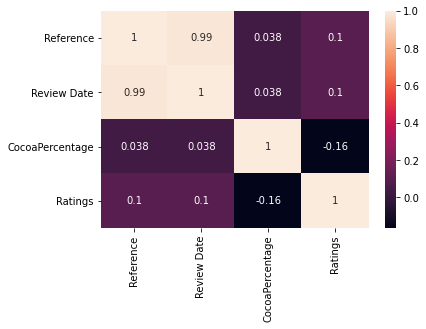

In [36]:
#create a heatmap showing an correlation between numeric variables in the dataset.
sns.heatmap(df.corr(), annot=True)
plt.show()

The chi squared contingency tests showed a clear association between ratings and company, company location, review year and cocoa percentage.  

The tests also showed that there is no association between cchocolate rating and origin, broad bean origin and bean type.

## Predict Ratings - Linear Regression

In [102]:
# Select the desired columns/ features for prediction
features=dfn[['CocoaPercentage', 'Review Date']]
label=dfn.Ratings

# split the data for training / testing
train_x, test_x, train_y, test_y = train_test_split(features,label,test_size = 0.2)
# Scale the data so it has mean of 0 and standard deviation of 1
scaler = StandardScaler()
scale_ftrain=scaler.fit_transform(train_x)
scale_ftest=scaler.fit_transform(test_x)

In [103]:
# Create and train the model for prediction
model = LinearRegression()
model.fit(scale_ftrain, train_y)
# Score the model on the train data

LinearRegression()

In [104]:
# Score the model on the test data
print(model.score(scale_ftest, test_y))
# Analyze the coefficients
print(model.coef_)

0.033829110088791636
[-0.0901961   0.03340742]


Linear Regression shows low accuracy, so is not a very reliable model.

In [126]:
print(len(df))

cloc_count=df.groupby("Company Location").count()
print(len(cloc_count))
#print(cloc_count.Ratings)
cp_count=df.groupby("CocoaPercentage").count()
print(len(cp_count))
#print(cp_count.Ratings)
year_count=df.groupby("Review Date").count()
print(len(year_count))
#print(year_count.Ratings)
com_count=df.groupby("Company").count()
print(len(com_count))
#print(year_count.Ratings)

1795
60
45
12
416


In [134]:
#create a new column on our chocolate dataframe which will show if the chocolate has a 'good' or 'bad' rating in binary numeric format.  The column will take anything rated as 3.5 or over as good (indicated with '1'), and anything under that threshold is rated as bad (indicated with '0')
dfn['Ratings Binary']= dfn['Ratings'].apply(lambda x: 1 if x > 3.5 else 0)
print(dfn.head(15))

    index  Reference  Review Date             Company Company Location  \
0       5       1315         2014            A. Morin           France   
1       7       1315         2014            A. Morin           France   
2       8       1319         2014            A. Morin           France   
3      11       1011         2013            A. Morin           France   
4      17       1015         2013            A. Morin           France   
5      24       1470         2015              Acalli           U.S.A.   
6      25        705         2011                 Adi             Fiji   
7      26        705         2011                 Adi             Fiji   
8      27        705         2011                 Adi             Fiji   
9      28        705         2011                 Adi             Fiji   
10     29        370         2009  Aequare (Gianduja)          Ecuador   
11     30        370         2009  Aequare (Gianduja)          Ecuador   
12     31        316         2009     

In [160]:
#create a new dataframe with only the columns that are needed for Logistic Regression and KNearest Neighbours.

df2=dfn[['Review Date', 'Company Location', 'CocoaPercentage', 'Bean Type', 'Ratings Binary']]

#split dataframe to 'X' (features) and 'y' (label) using iloc to split 

X = df2.iloc[:, :-1].values 
y = df2.iloc[:, -1].values 

#print(y)

#label encode each column that will be used for features determination.  This will convert each veriable to numeric format.

labelencoder_X = LabelEncoder()

X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,1] = labelencoder_X.fit_transform(X[:,1])
X[:,2] = labelencoder_X.fit_transform(X[:,2])
X[:,3] = labelencoder_X.fit_transform(X[:,3])
print(X)

#one hot encoder will transform the dataframe to binary code so that it can be processed by machine learning models.  Each row in the dataframe will be converted to an array.
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
print(X[12])

[[8 16 16 8]
 [8 16 16 8]
 [8 16 16 8]
 [7 16 16 8]
 [7 16 16 33]
 [9 47 16 8]
 [5 14 5 33]
 [5 14 27 33]
 [5 14 34 33]
 [5 14 18 33]
 [3 12 2 22]
 [3 12 16 22]
 [3 29 16 8]
 [5 45 23 33]
 [4 45 23 8]
 [4 45 23 20]
 [8 16 11 33]
 [8 16 23 33]
 [8 16 23 33]
 [7 16 23 33]
 [11 30 16 26]
 [11 30 16 18]
 [11 30 16 33]
 [11 30 16 20]
 [7 47 5 33]
 [4 47 16 33]
 [1 47 16 33]
 [1 47 16 8]
 [3 42 16 20]
 [3 42 32 20]
 [7 33 20 33]
 [9 6 10 33]
 [9 6 12 33]
 [1 25 16 14]
 [1 25 16 33]
 [1 25 16 33]
 [1 25 16 33]
 [1 25 16 33]
 [1 25 16 34]
 [1 25 16 34]
 [1 25 16 33]
 [7 5 23 25]
 [4 5 32 27]
 [4 5 0 27]
 [4 5 23 27]
 [4 5 5 27]
 [8 16 23 33]
 [10 47 16 33]
 [10 47 20 33]
 [10 47 16 26]
 [9 47 14 26]
 [9 47 16 26]
 [9 47 16 33]
 [9 47 16 18]
 [7 46 18 33]
 [4 46 18 33]
 [4 46 18 33]
 [3 46 23 18]
 [3 46 18 33]
 [3 46 27 18]
 [3 46 23 8]
 [3 46 18 33]
 [2 46 18 20]
 [7 46 18 33]
 [10 47 14 33]
 [5 47 18 33]
 [5 47 16 33]
 [3 47 25 33]
 [1 47 23 33]
 [1 47 16 22]
 [6 2 16 33]
 [8 47 16 26]
 [6 47

In [161]:
# split the data for training / testing
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2)
# Scale the data so it has mean of 0 and standard deviation of 1
scaler = StandardScaler()
scale_ftrain=scaler.fit_transform(train_x)
scale_ftest=scaler.fit_transform(test_x)

In [162]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(train_x, train_y)
# Score the model on the test data
print(model.score(test_x, test_y))


0.7808988764044944


In [163]:
#create sample 'new' data to test-predict their ratings 

choc1 = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
choc2 = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
choc3 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
# Combine  arrays

new = np.array([choc1, choc2, choc3])
# Scale the sample passenger features
new =scaler.transform(new)
print(new)

# Scale the sample chocolate features
new=scaler.transform(new)
print(new)

[[-0.23076923 -0.25664813 -0.29217435  3.42261387 -0.23076923 -0.30335547
  -0.28069179 -0.34568317 -0.45922146 -0.39477102 -0.3354102  -0.0751646
   0.         -0.10660036 -0.20232566 -0.0751646  -0.20232566 -0.10660036
  -0.21693046 -0.0751646  -0.0751646   0.          0.          0.
  -0.18677184  0.          0.          0.         -0.29217435 -0.25664813
   0.          0.         -0.0751646  -0.20232566  0.         -0.10660036
   0.         -0.23076923 -0.10660036 -0.10660036 -0.10660036  1.
  -0.0751646   0.          0.          0.          0.         -0.0751646
   0.         -0.0751646  -0.10660036  0.          0.          0.
  -0.0751646   0.          0.         -0.15161961 -0.26886643 -0.78624539
  -0.13093073  0.          0.          0.         -0.10660036 -0.0751646
  -0.0751646  -0.10660036  0.          0.          0.         -0.0751646
  -0.10660036 -0.23076923 -0.10660036 -0.13093073 -0.20232566 -0.0751646
   1.35107247 -0.0751646  -0.30335547 -0.0751646  -0.15161961 -0.07

In [165]:
#use the built in 'predict' method to predict the rating classification of the new chocolate.
print(model.predict(new))
print(model.predict_proba(new))
#use the built in 'predict_proba' method to show the probability that the new chocolate belongs to each rating classification.

[0 1 1]
[[9.99794560e-01 2.05439761e-04]
 [3.70502592e-04 9.99629497e-01]
 [0.00000000e+00 1.00000000e+00]]


In [166]:
# Create and train the K-Nearest Neighbours classification model
classifier=KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_x, train_y)
#use the 'score' method to establish the percentage accuracy of the K-Nearest Neighbours classification model.
accuracy=classifier.score(test_x, test_y)
print(accuracy)

0.7640449438202247


In [167]:
print(classifier.predict(new))

[1 0 0]


Logistic Regression and kNearest Neighbours Classification models were tested with scaled data but accuracy scores went down by 1-2% and so the final model uses data that is not scaled.  